In [1]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


# Using the NYC Open Data to get 'Noise' complaints from 311

df = pd.read_csv('../data/311_Service_Requests_from_2010_to_Present.csv', low_memory=False)

# 2. Filtering for Noise immediately to save memory
noise_df = df[df['Complaint Type'].str.contains('Noise', case=False, na=False)].copy()

# 3. Clean missing coordinates
noise_df = noise_df.dropna(subset=['Latitude', 'Longitude'])

# Converting the Latitude/Longitude into a 'Geography' format
gdf = gpd.GeoDataFrame(
    noise_df, geometry=gpd.points_from_xy(noise_df.Longitude, noise_df.Latitude), crs="EPSG:4326"
)

print(f"Successfully loaded {len(gdf)} noise complaints!")
gdf.head()

Successfully loaded 118676 noise complaints!


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,geometry
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",POINT (-73.9235 40.86568)
12,32306612,12/31/2015 11:48:03 PM,01/01/2016 02:17:59 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10461.0,1701 PILGRIM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.845545,-73.833585,"(40.845545043640215, -73.83358471831198)",POINT (-73.83358 40.84555)
17,32310273,12/31/2015 11:44:52 PM,01/01/2016 12:36:10 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",POINT (-73.98343 40.67915)
18,32306617,12/31/2015 11:40:59 PM,01/01/2016 02:37:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",POINT (-73.9302 40.61655)
19,32308195,12/31/2015 11:40:55 PM,01/01/2016 12:28:31 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10026.0,264 WEST 118 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.805267,-73.953353,"(40.80526715877265, -73.9533526205901)",POINT (-73.95335 40.80527)


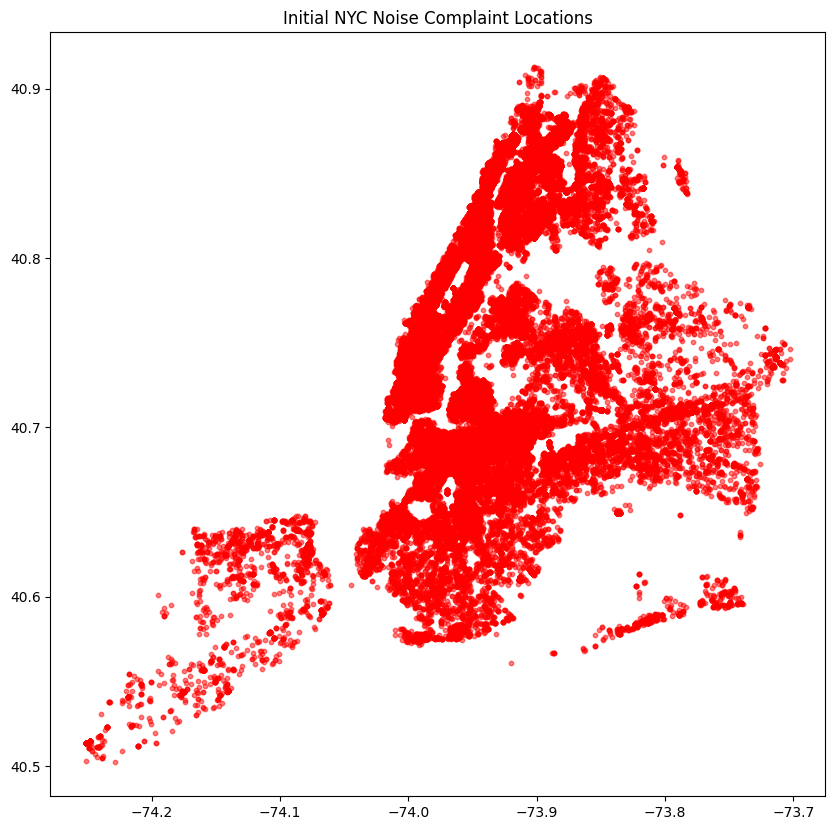

In [2]:
# Create a quick plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, markersize=10, color='red')

ax.set_title("Initial NYC Noise Complaint Locations")
plt.show()

In [3]:

## Since our project title is Noise Pollution & Sleep Quality, we don't care about a lawnmower at 2:00 PM as much as we care about loud music at 2:00 AM.
## Let's filter for the "Sleep Risk Zone" (11:00 PM to 5:00 AM):

# Convert 'Created Date' to a real datetime format
noise_df['Created Date'] = pd.to_datetime(noise_df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the hour (0-23)
noise_df['hour'] = noise_df['Created Date'].dt.hour

# Filter for Nighttime: 11 PM (23) to 5 AM (5)
night_noise = noise_df[(noise_df['hour'] >= 23) | (noise_df['hour'] <= 5)]

print(f"Total Nighttime Noise Events: {len(night_noise)}")
gdf.head()

Total Nighttime Noise Events: 52260


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,geometry
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",POINT (-73.9235 40.86568)
12,32306612,12/31/2015 11:48:03 PM,01/01/2016 02:17:59 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10461.0,1701 PILGRIM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.845545,-73.833585,"(40.845545043640215, -73.83358471831198)",POINT (-73.83358 40.84555)
17,32310273,12/31/2015 11:44:52 PM,01/01/2016 12:36:10 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",POINT (-73.98343 40.67915)
18,32306617,12/31/2015 11:40:59 PM,01/01/2016 02:37:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",POINT (-73.9302 40.61655)
19,32308195,12/31/2015 11:40:55 PM,01/01/2016 12:28:31 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10026.0,264 WEST 118 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.805267,-73.953353,"(40.80526715877265, -73.9533526205901)",POINT (-73.95335 40.80527)


C:\Users\Maggie Williams\AppData\Local\Temp\ipykernel_12820\3410827464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night_noise['Hour'] = pd.to_datetime(night_noise['Created Date']).dt.hour


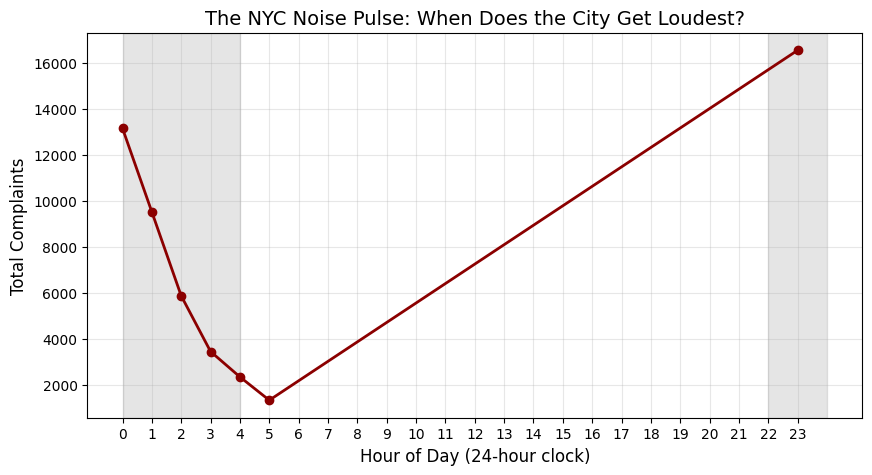

In [4]:
# Creating an 'Hour' column from the Created Date
# We use .dt.hour to see exactly when people start calling 311
night_noise['Hour'] = pd.to_datetime(night_noise['Created Date']).dt.hour

# Group by hour to see the city's 'Noise Pulse'
hourly_trend = night_noise.groupby('Hour').size()

# Plot the 'Pulse' of the City
plt.figure(figsize=(10, 5))
plt.plot(hourly_trend.index, hourly_trend.values, marker='o', color='darkred', linewidth=2)

plt.title('The NYC Noise Pulse: When Does the City Get Loudest?', fontsize=14)
plt.xlabel('Hour of Day (24-hour clock)', fontsize=12)
plt.ylabel('Total Complaints', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.axvspan(22, 24, color='gray', alpha=0.2, label='Peak Nightlife Start')
plt.axvspan(0, 4, color='black', alpha=0.1)

plt.show()

In [5]:
## Interactive Heatmap showing which blocks are the "Sleep Killers."
import folium
from folium.plugins import HeatMap

# 1. Creating a base map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles='cartodbpositron')

# 2. Prepare the data (Latitude, Longitude) for the HeatMap
# We'll take a sample of 10,000 for performance
heat_data = [[row['Latitude'], row['Longitude']] for index, row in night_noise.sample(10000).iterrows()]

# 3. Add the HeatMap layer
HeatMap(heat_data, radius=10, blur=15).add_to(m)

# 4. Save and view
m.save('nyc_sleep_risk_map.html')
m

In [6]:
# 1. Filter specifically for Commercial Noise only
comm_noise = night_noise[night_noise['Complaint Type'].str.contains('Commercial', case=False, na=False)].copy()

# 2. Get the Top 10 Zip Codes for Commercial Noise specifically
# We convert to string and strip to handle any formatting issues
comm_noise['Incident Zip'] = comm_noise['Incident Zip'].astype(str).str.strip().str.replace('.0', '', regex=False)
top_10_zips = comm_noise['Incident Zip'].value_counts().head(10)

# 3. PRINT the results for the records
print("--- Top 10 Commercial Noise Hotspots (11 PM - 5 AM) ---")
print(top_10_zips)

--- Top 10 Commercial Noise Hotspots (11 PM - 5 AM) ---
Incident Zip
10034    1047
10002     833
10009     816
10029     792
11216     762
11238     758
10040     615
10003     603
11103     585
11211     565
Name: count, dtype: int64


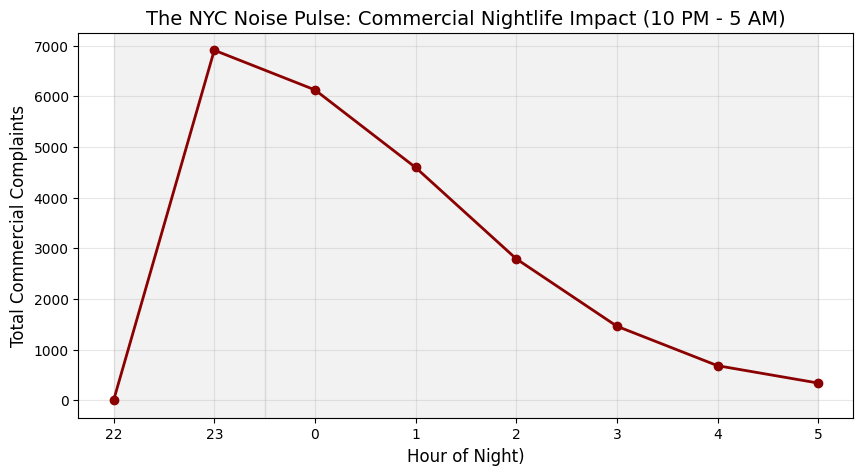

In [7]:
# Creating an 'Hour' column from the Created Date
# We use .dt.hour to see exactly when people start calling 311
# Filter for the specific hours (22, 23, 0, 1, 2, 3, 4, 5)
night_hours = [22, 23, 0, 1, 2, 3, 4, 5]
comm_noise['Hour'] = pd.to_datetime(comm_noise['Created Date']).dt.hour
comm_night_only = comm_noise[comm_noise['Hour'].isin(night_hours)]


# Group by hour to see the city's 'Noise Pulse'
# We use a categorical sort so 23 leads into 0 correctly
comm_night_only['Hour'] = pd.Categorical(comm_night_only['Hour'], categories=night_hours, ordered=True)
comm_hourly_trend = comm_night_only.groupby('Hour', observed=True).size().reindex(night_hours, fill_value=0)


# Plot the 'Pulse' of the City
plt.figure(figsize=(10, 5))
plt.plot(range(len(night_hours)), comm_hourly_trend.values, marker='o', color='darkred', linewidth=2)

plt.title('The NYC Noise Pulse: Commercial Nightlife Impact (10 PM - 5 AM)', fontsize=14)
plt.xlabel('Hour of Night)', fontsize=12)
plt.ylabel('Total Commercial Complaints', fontsize=12)
plt.xticks(range(len(night_hours)), night_hours)
plt.grid(True, alpha=0.3)
plt.axvspan(0, 1.5, color='gray', alpha=0.1, label='Pre-Midnight')# 10 PM - Midnight
plt.axvspan(1.5, 7, color='black', alpha=0.05, label='Post-Midnight')# Midnight - 5 AM

plt.show()

In [8]:
# 1. Create a dictionary of names for your Top 10 Zip Codes
neighborhood_map = {
    '10034': 'Inwood / Washington Heights',
    '10002': 'Lower East Side / Chinatown',
    '10009': 'East Village / Alphabet City',
    '10029': 'East Harlem',
    '11216': 'Bed-Stuy (Brooklyn)',
    '11238': 'Prospect Heights (Brooklyn)',
    '10040': 'Washington Heights (North)',
    '10003': 'Greenwich Village / Union Sq',
    '11103': 'Astoria (Queens)',
    '11211': 'Williamsburg (Brooklyn)'
}

# 2. Convert your Top 10 results into a clean Table (DataFrame)
top_10_df = top_10_zips.reset_index()
top_10_df.columns = ['Zip Code', 'Complaint Count']

# 3. Add the 'Neighborhood' column
top_10_df['Neighborhood'] = top_10_df['Zip Code'].map(neighborhood_map)

# 4. Show the final result
print("--- Top 10 Noise Hotspots with Neighborhood Names ---")
print(top_10_df[['Neighborhood', 'Zip Code', 'Complaint Count']])

--- Top 10 Noise Hotspots with Neighborhood Names ---
                   Neighborhood Zip Code  Complaint Count
0   Inwood / Washington Heights    10034             1047
1   Lower East Side / Chinatown    10002              833
2  East Village / Alphabet City    10009              816
3                   East Harlem    10029              792
4           Bed-Stuy (Brooklyn)    11216              762
5   Prospect Heights (Brooklyn)    11238              758
6    Washington Heights (North)    10040              615
7  Greenwich Village / Union Sq    10003              603
8              Astoria (Queens)    11103              585
9       Williamsburg (Brooklyn)    11211              565


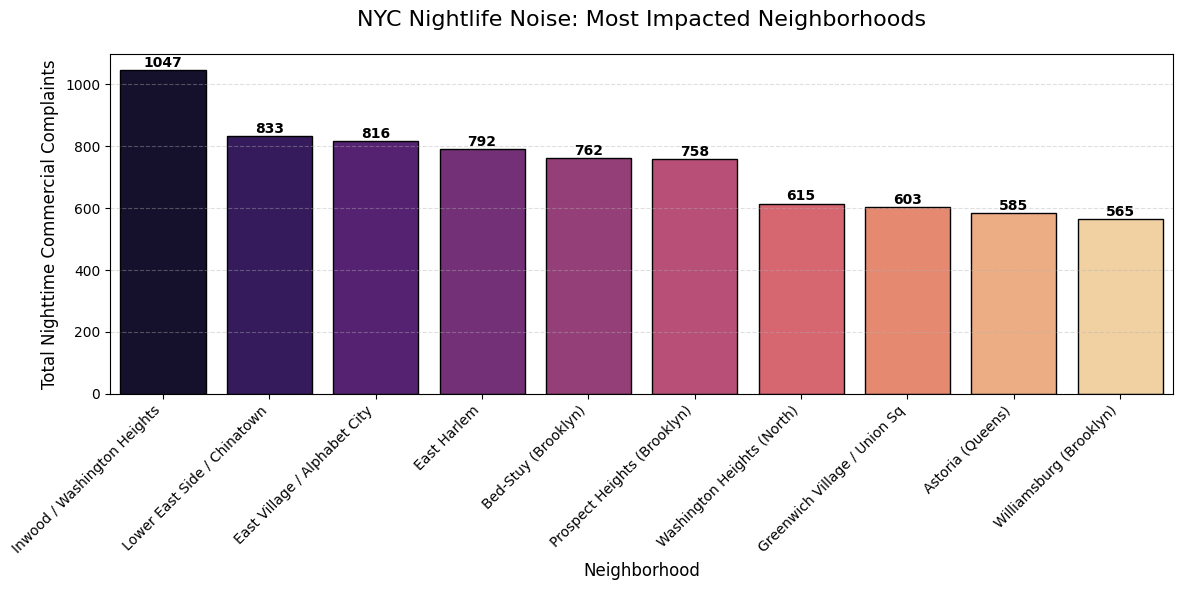

In [9]:
# The Final Visual
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_df,
    x='Neighborhood', 
    y='Complaint Count', 
    hue='Neighborhood',  # Assigning hue to the x variable to satisfy the warning
    palette='magma', 
    edgecolor='black',
    legend=False            # Hiding the legend since the colors are just for style
)



plt.xticks(rotation=45, ha='right')
plt.title('NYC Nightlife Noise: Most Impacted Neighborhoods', fontsize=16, pad=20)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Total Nighttime Commercial Complaints', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)


# Add data labels on top of bars
for i, v in enumerate(top_10_zips.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
# Check the earliest and latest dates in your data
print(f"Start Date: {df['Created Date'].min()}")
print(f"End Date: {df['Created Date'].max()}")


Start Date: 01/01/2015 01:00:16 AM
End Date: 12/31/2015 12:59:18 PM
